## 8.1. Exercise: Probing Type I and Type II neuron models

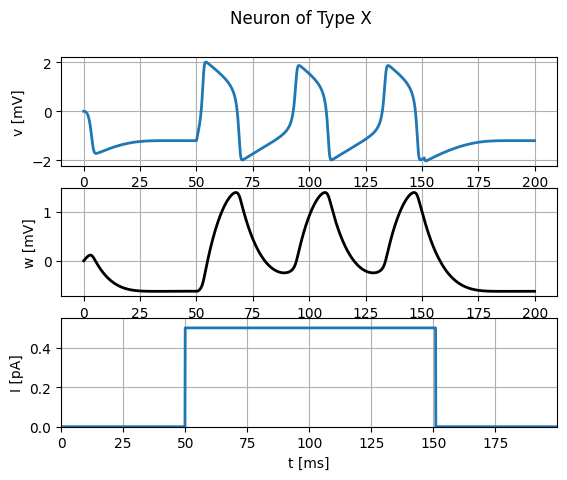

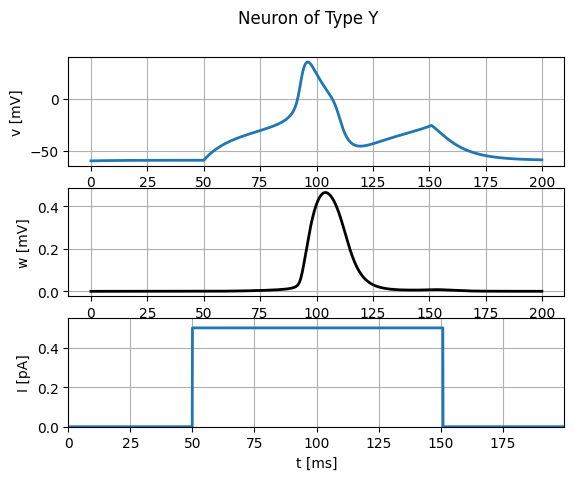

In [48]:
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.tools import input_factory, plot_tools, spike_tools
from neurodynex3.neuron_type import neurons

# create an input current
input_current = input_factory.get_step_current(50, 150, 1.*b2.ms, 0.5*b2.pA)

# get one instance of class NeuronX and save that object in the variable 'a_neuron_of_type_X'
a_neuron_of_type_X = neurons.NeuronX()  # we do not know if it's type I or II
# simulate it and get the state variables
state_monitor = a_neuron_of_type_X.run(input_current, 200*b2.ms)
# plot state vs. time
neurons.plot_data(state_monitor, title="Neuron of Type X")

# get an instance of class NeuronY
a_neuron_of_type_Y = neurons.NeuronY()  # we do not know if it's type I or II
state_monitor = a_neuron_of_type_Y.run(input_current, 200*b2.ms)
neurons.plot_data(state_monitor, title="Neuron of Type Y")

## 8.1.1. Question: Estimating the threshold
What is the threshold current for repetitive firing for NeuronX and NeuronY?

Exploring various values of I_amp, find the range in which the threshold occurs, to a precision of 0.01.

Plot the responses to step current which starts after 100ms (to let the system equilibrate) and lasting at least 1000ms (to detect repetitive firing with a long period). You can do this by modifying the code example given above. Make sure to check the documentation of the functions you use: input_factory.get_step_current(), neuron_type.neurons.run() and neuron_type.neurons.plot_data().

Already from the voltage response near threshold you might have an idea which is type I or II, but let’s investigate further.

In [53]:
spike_threshold= -2*b2.mV # it's a Quantity 0-2?  -50

#input_factory.get_step_current(100, 110, 1*b2.ms, 0.5*b2.pA)  1000*b2.ms
input_current = input_factory.get_step_current(100, 1100, 1.*b2.ms, 0.5*b2.pA)
# get one instance of class NeuronX and save that object in the variable 'a_neuron_of_type_X'
a_neuron_of_type_X = neurons.NeuronX() 
# simulate it and get the state variables
state_monitor = a_neuron_of_type_X.run(input_current, 1200*b2.ms)
spike_times = spike_tools.get_spike_time(state_monitor,spike_threshold)
print(spike_times)
print(type(spike_times))  # it's a Quantity

spike_tools.pretty_print_spike_train_stats(state_monitor,spike_threshold)

[1.1072] s
<class 'brian2.units.fundamentalunits.Quantity'>
nr of spikes: 1
mean ISI: nan s
ISI variance: nan s^2
spike freq: nan Hz
spike times: [1.1072] s
ISI: [] s


(array([1.1072]) * second,
 array([], dtype=float64) * second,
 nan * second,
 nan * hertz,
 nan * second2)

In [52]:
spike_threshold= -50*b2.mV # it's a Quantity 0-2?  -50

#input_factory.get_step_current(100, 110, 1*b2.ms, 0.5*b2.pA)  1000*b2.ms
input_current = input_factory.get_step_current(100, 1100, 1.*b2.ms, 0.5*b2.pA)
# get one instance of class NeuronX and save that object in the variable 'a_neuron_of_type_Y'
a_neuron_of_type_Y = neurons.NeuronY() 
# simulate it and get the state variables
state_monitor = a_neuron_of_type_Y.run(input_current, 1200*b2.ms)
spike_times = spike_tools.get_spike_time(state_monitor,spike_threshold)
print(spike_times)
print(type(spike_times))  # it's a Quantity

spike_tools.pretty_print_spike_train_stats(state_monitor,spike_threshold)

[104.6] ms
<class 'brian2.units.fundamentalunits.Quantity'>
nr of spikes: 1
mean ISI: nan s
ISI variance: nan s^2
spike freq: nan Hz
spike times: [104.6] ms
ISI: [] s


(array([104.6]) * msecond,
 array([], dtype=float64) * second,
 nan * second,
 nan * hertz,
 nan * second2)

In [59]:
def get_firing_rate(Neuron, input_current, spike_threshold=0*b2.mV):
    f=0
    # inject a test current into the neuron and call it's run() function.
    if Neuron == a_neuron_of_type_X:
        neuron = neurons.NeuronX()
        state_monitor = neuron.run(input_current,1200*b2.ms)
        spike_threshold=-2*b2.mV
    elif Neuron == a_neuron_of_type_Y:
        neuron = neurons.NeuronY()
        spike_threshold=-50*b2.mV
        state_monitor = neuron.run(input_current,1200*b2.ms)
    # get the spike times using spike_tools.get_spike_times
    st = spike_tools.get_spike_time(state_monitor,spike_threshold)
    print(st)
    # from the spike times, calculate the firing rate f
    isi = st[1:]-st[:-1]
    if len(isi) >0:
        f=1/np.mean(isi)
    return f

spikeX_firing_rate = get_firing_rate(a_neuron_of_type_X, input_current, spike_threshold=-50*b2.mV)
print(spikeX_firing_rate)

spikeY_firing_rate = get_firing_rate(a_neuron_of_type_X, input_current, spike_threshold=-2*b2.mV)
print(spikeY_firing_rate)

[1.1072] s
0
[1.1072] s
0


In [62]:
import matplotlib.pyplot as plt
import numpy as np

def plot_fI_curve(Neuron):#NeuronClass

    plt.figure()  # new figure

    #neuron = NeuronClass()  # instantiate the neuron class
        

    I = np.arange(0.0,1.1,0.1)  # a range of current inputs
    f = []

    # loop over current values
    for I_amp in I:

        input_current = input_factory.get_step_current(0, int((I_amp+0.01)*1000), 1.*b2.ms, 0.5*b2.pA)
        if Neuron == a_neuron_of_type_X:
            neuron = neurons.NeuronX()
            spike_threshold=-2*b2.mV
        elif Neuron == a_neuron_of_type_Y:
            neuron = neurons.NeuronY()
            spike_threshold=-50*b2.mV
        firing_rate = get_firing_rate(neuron, input_current, spike_threshold)
        f.append(firing_rate)
        
    #
    #firing_rate = get_firing_rate(neuron, input_current, spike_threshold=1*b2.mV)
    print(f)
    
    plt.plot(I, f)
    #plt.plot(input_current, firing_rate)
    plt.xlabel('Amplitude of Injecting step current (pA)')
    plt.ylabel('Firing rate (Hz)')
    plt.grid()
    plt.show()

print("a_neuron_of_type_X is : {}".format(a_neuron_of_type_X.get_neuron_type()))
plot_fI_curve(a_neuron_of_type_X)
print("a_neuron_of_type_Y is : {}".format(a_neuron_of_type_Y.get_neuron_type()))
plot_fI_curve(a_neuron_of_type_Y)

a_neuron_of_type_X is : Type II


UnboundLocalError: local variable 'state_monitor' referenced before assignment

<Figure size 640x480 with 0 Axes>

The final weight vector w is: (0.5439299293276748,0.8400037209423049)


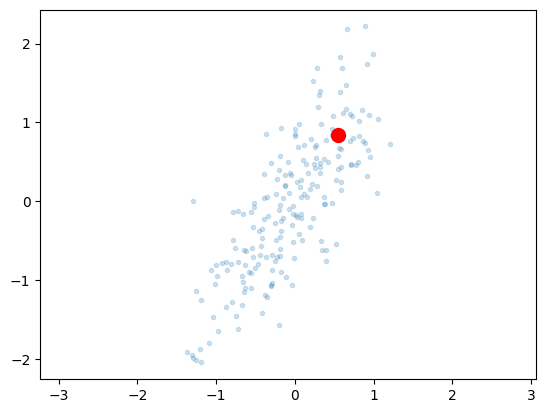

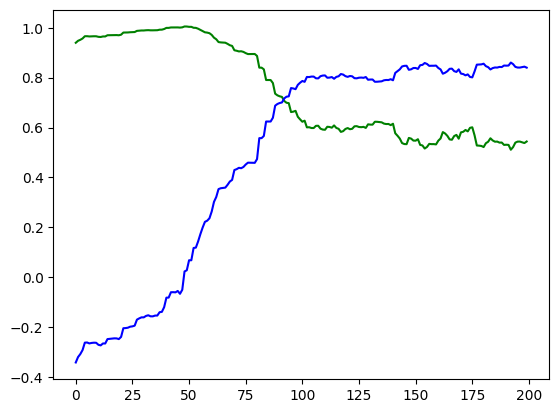

In [3]:

import neurodynex3.ojas_rule.oja as oja
import matplotlib.pyplot as plt

cloud = oja.make_cloud(n=200, ratio=.3, angle=60)
wcourse = oja.learn(cloud, initial_angle=-20, eta=0.04)
plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')
plt.figure()
plt.plot(wcourse[:, 0], "g")
plt.plot(wcourse[:, 1], "b")
print("The final weight vector w is: ({},{})".format(wcourse[-1,0],wcourse[-1,1]))

### 9.1.1. Question: The norm of the weights
Run the script with a large learning rate eta = 0.2. What do you observe?
It converes faster. 
Modify the script: plot the time course of the norm of the weights vector.

The final norm of weight vector w is: 0.5090842394397941


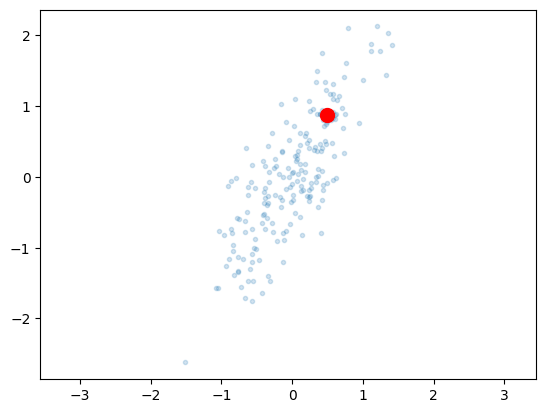

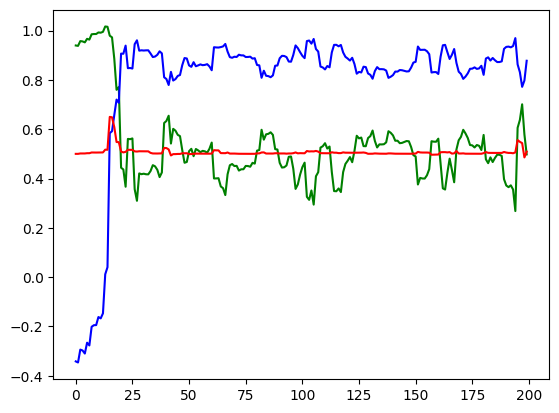

In [6]:
import neurodynex3.ojas_rule.oja as oja
import matplotlib.pyplot as plt

cloud = oja.make_cloud(n=200, ratio=.3, angle=60)
wcourse = oja.learn(cloud, initial_angle=-20, eta=0.2)
plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')
plt.figure()
plt.plot(wcourse[:, 0], "g")
plt.plot(wcourse[:, 1], "b")
plt.plot((wcourse[:, 0]**2+wcourse[:, 1]**2)**1/2, "r")
print("The final norm of weight vector w is: {}".format((wcourse[-1, 0]**2+wcourse[-1, 1]**2)**1/2))

9.2. Exercise: Circular data
Now we study Oja’s rule on a data set which has no correlations. Use the functions make_cloud and learn to get the timecourse for weights that are learned on a circular data cloud (ratio=1). Plot the time course of both components of the weight vector. Repeat this many times (learn will choose random initial conditions on each run), and plot this into the same plot. Can you explain what happens? Try different learning rates eta.

The final norm of weight vector w is: 0.5233919496285955


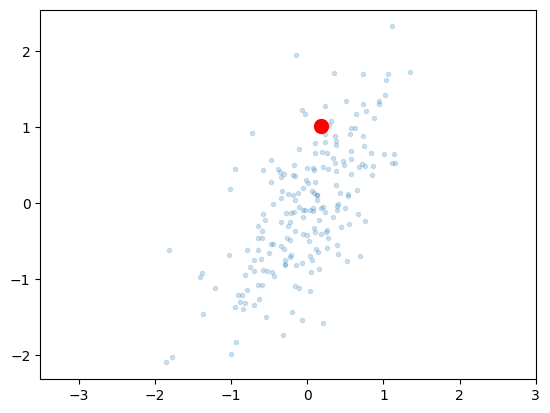

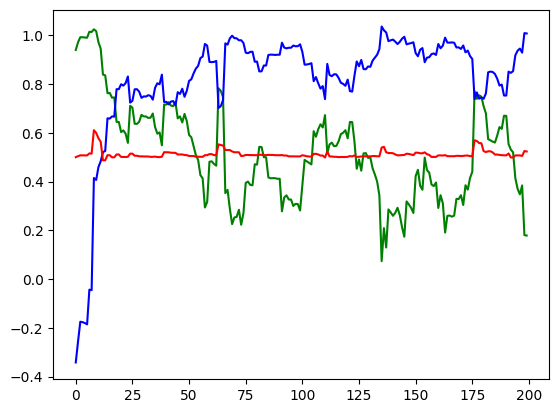

In [8]:
import neurodynex3.ojas_rule.oja as oja
import matplotlib.pyplot as plt

cloud = oja.make_cloud(n=200, ratio=.4, angle=60)
wcourse = oja.learn(cloud, initial_angle=-20, eta=0.2)
plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')
plt.figure()
plt.plot(wcourse[:, 0], "g")
plt.plot(wcourse[:, 1], "b")
plt.plot((wcourse[:, 0]**2+wcourse[:, 1]**2)**1/2, "r")
print("The final norm of weight vector w is: {}".format((wcourse[-1, 0]**2+wcourse[-1, 1]**2)**1/2))